In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### Importing and Displaying dataset

In [162]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [164]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Summary Statistics

In [165]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Exploratory Data Analysis

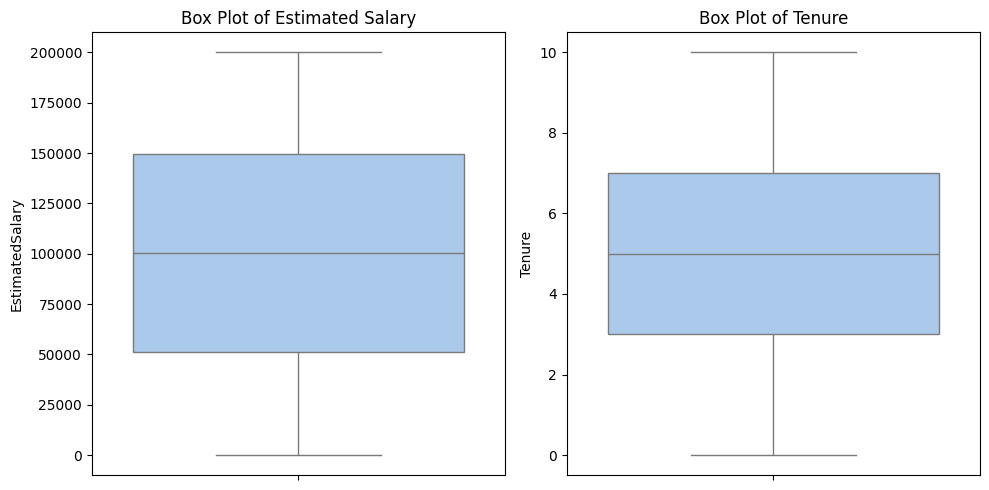

In [166]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='EstimatedSalary', data=df)
plt.title('Box Plot of Estimated Salary')

plt.subplot(1, 2, 2)
sns.boxplot(y='Tenure', data=df)
plt.title('Box Plot of Tenure')

plt.tight_layout()
plt.show()

No outliers detected for Estimated salary and Tenure

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


<ipython-input-167-379cbd76b1ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geography_exited.index, y=geography_exited.values, palette=['orange','blue','green'])


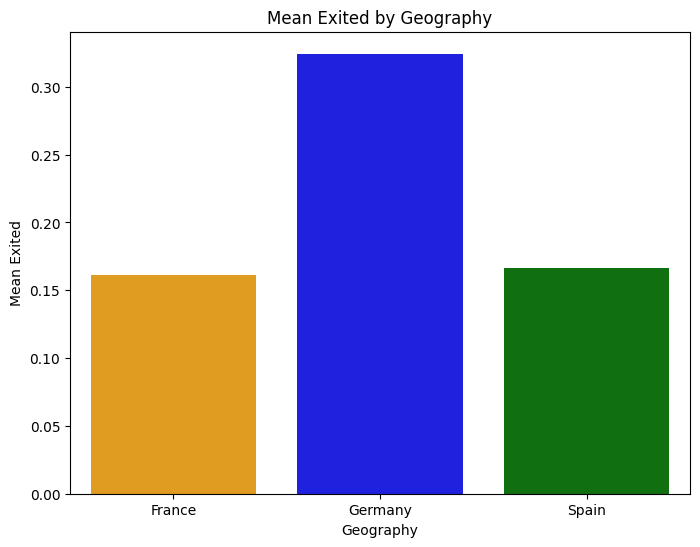

In [167]:
geography_exited = df.groupby('Geography')['Exited'].mean()
print(geography_exited)

plt.figure(figsize=(8, 6))
sns.barplot(x=geography_exited.index, y=geography_exited.values, palette=['orange','blue','green'])
plt.xlabel('Geography')
plt.ylabel('Mean Exited')
plt.title('Mean Exited by Geography')
plt.show()

Most exited customer are from Germany.

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


<ipython-input-168-ad9ec6b2a46e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geography_exited.index, y=geography_exited.values, palette=['orange','blue'])


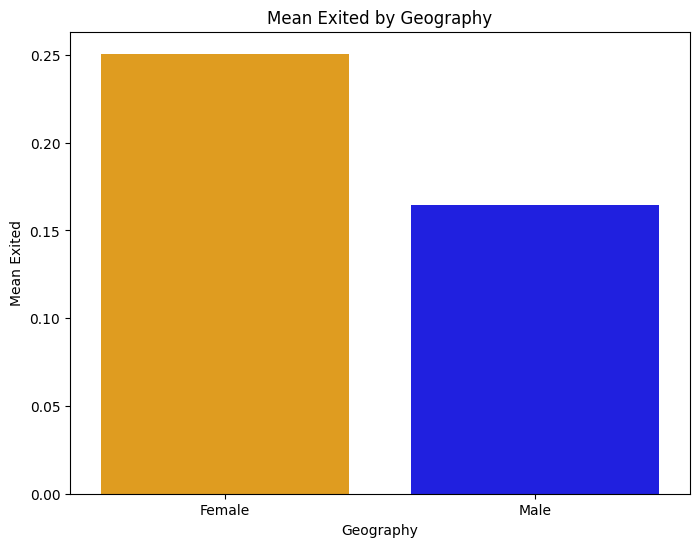

In [168]:
geography_exited = df.groupby('Gender')['Exited'].mean()
print(geography_exited)

plt.figure(figsize=(8, 6))
sns.barplot(x=geography_exited.index, y=geography_exited.values, palette=['orange','blue'])
plt.xlabel('Geography')
plt.ylabel('Mean Exited')
plt.title('Mean Exited by Geography')
plt.show()

Female exited more than men.

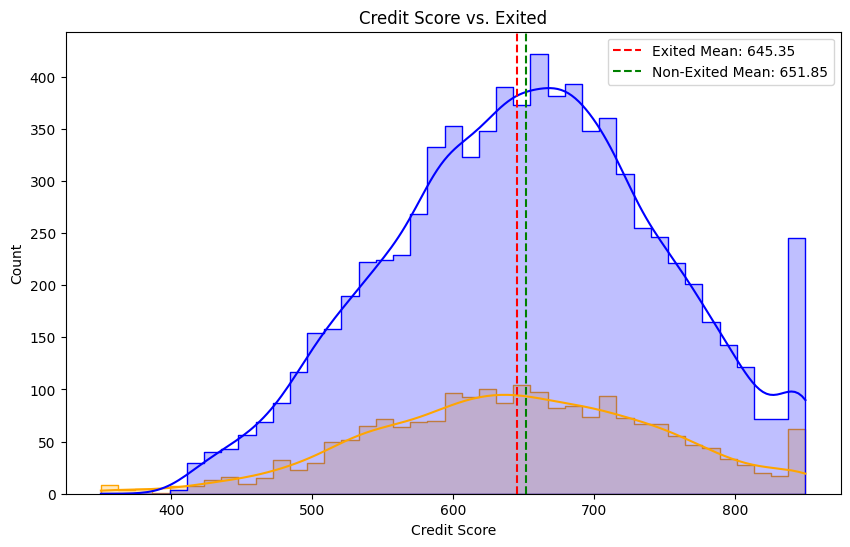

In [169]:
mean_exited = df[df['Exited'] == 1]['CreditScore'].mean()
mean_non_exited = df[df['Exited'] == 0]['CreditScore'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True, element="step", palette=['blue', 'orange'])
plt.title('Credit Score vs. Exited')
plt.xlabel('Credit Score')
plt.ylabel('Count')

plt.axvline(mean_exited, color='red', linestyle='--', label=f'Exited Mean: {mean_exited:.2f}')
plt.axvline(mean_non_exited, color='green', linestyle='--', label=f'Non-Exited Mean: {mean_non_exited:.2f}')

plt.legend()
plt.show()



The mean credit score of customer who exited is lower than that of those who did not exit or churn. It might suggest a relationship between lower creditworthiness and the likelihood of churn. This could indicate that customers with lower credit scores are more likely to leave.

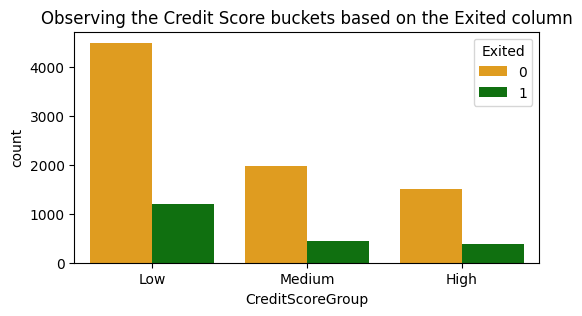

In [170]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Exited', data = df, palette=['orange','green'])
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

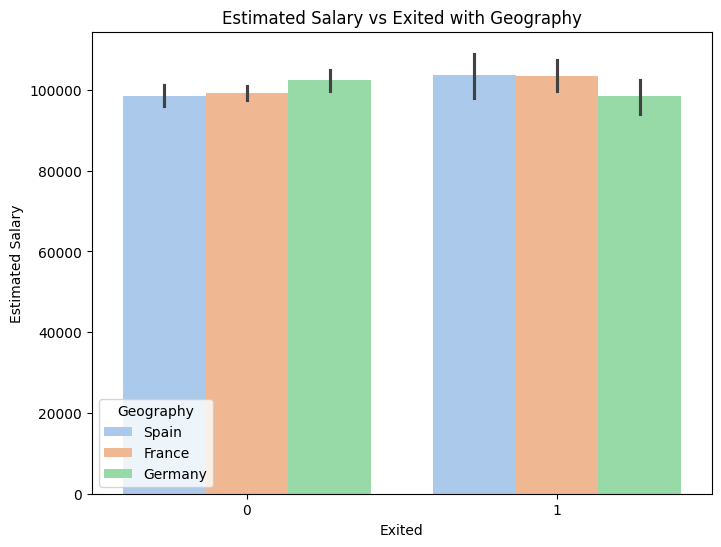

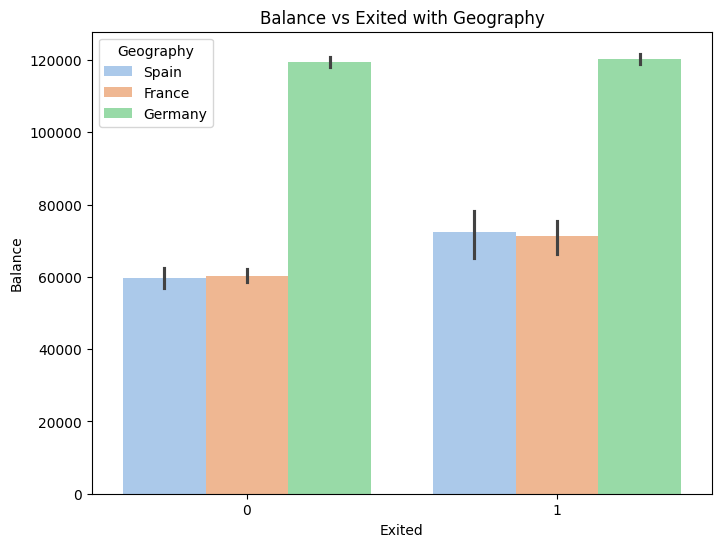

In [171]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Exited', y='EstimatedSalary', hue='Geography', data=df)
plt.title('Estimated Salary vs Exited with Geography')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Exited', y='Balance', hue='Geography', data=df)
plt.title('Balance vs Exited with Geography')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

From this two above graph it can be stated that even though 'EstimatedSalary' has a relationship with exited but 'Balance' does not have any significant relationship

### Feature Engineering

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Balance', 'EstimatedSalary','CreditScore','Age']] = scaler.fit_transform(df[['Balance', 'EstimatedSalary','CreditScore','Age']])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup
0,15634602,Hargrave,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1,Low
1,15647311,Hill,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0,Low
2,15619304,Onio,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1,Low
3,15701354,Boni,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0,Medium
4,15737888,Mitchell,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0,High


In [173]:
df2 = df.copy()
df2 = pd.get_dummies(df, columns=['Geography'])

df2['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df2.drop(['CustomerId','Surname'], axis=1, inplace=True)
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,Low,True,False,False
1,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,Low,False,False,True
2,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,Low,True,False,False
3,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,Medium,True,False,False
4,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,High,False,False,True


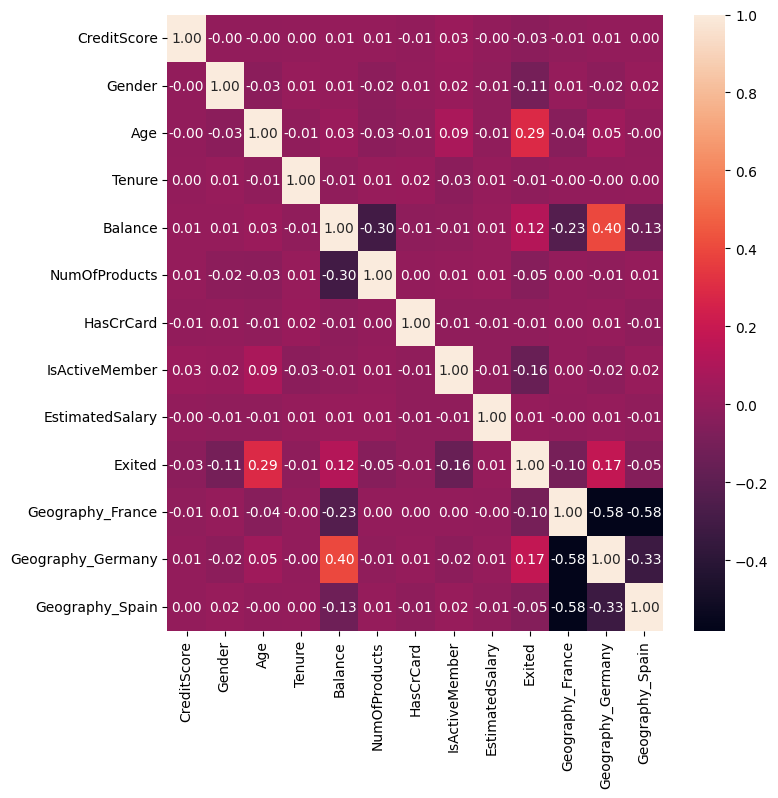

In [174]:
plt.figure(figsize = (8,8))
sns.heatmap(df2.drop('CreditScoreGroup',axis=1).corr(), annot=True, fmt='.2f')
plt.show()

There is a low-moderate correlation between age and exited, which indicates that older customers are more likely to churn. Negative correlation between balance and number of products. Geographically Germany has highest balance among the three countries.

In [175]:
label_encoder = LabelEncoder()
df2['CreditScoreGroup'] = label_encoder.fit_transform(df2['CreditScoreGroup'])


### Machine Learning Model Implementation

In [176]:
x = df2.drop(['Exited'],axis=1)
y = df2['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [177]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    if name in ["Logistic Regression"]:  # For regression models
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        results.append([name, r2, mse])
    else:  # For classification models
        accuracy = accuracy_score(y_test, y_pred)
        results.append([name, accuracy, 0])


results_df = pd.DataFrame(results, columns=["Model", "Accuracy/R2", "MSE"])
print(results_df)

                    Model  Accuracy/R2     MSE
0     Logistic Regression    -0.181219  0.1865
1           Decision Tree     0.781000  0.0000
2           Random Forest     0.869500  0.0000
3  Support Vector Machine     0.833000  0.0000
4     K-Nearest Neighbors     0.820000  0.0000
5             Naive Bayes     0.825000  0.0000


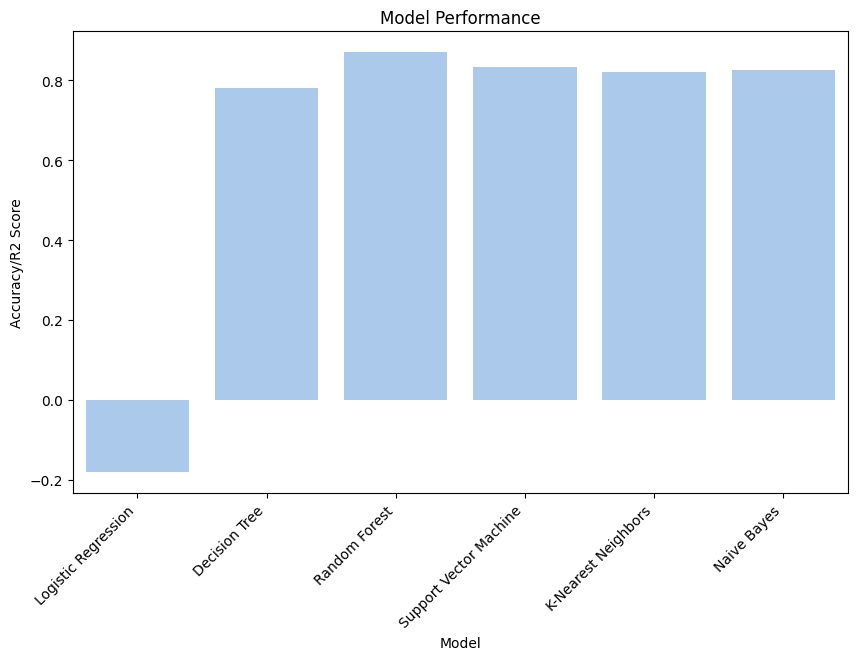

In [178]:
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
sns.barplot(x="Model", y="Accuracy/R2", data=results_df)
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance")
plt.ylabel("Accuracy/R2 Score")
plt.show()

### Model Performance Analysis

Based on the results, the Random Forest and Support Vector Machine models achieved the highest accuracy scores, indicating their strong ability to predict customer churn.  Logistic Regression, on the other hand, had a lower accuracy, suggesting it may not be the most suitable model for this particular dataset.

The superior performance of Random Forest could be attributed to its ability to capture complex interactions between features. Support Vector Machine also demonstrated good performance, highlighting its effectiveness in handling high-dimensional data.

These findings suggest that the bank could leverage Random Forest or Support Vector Machine to predict customer churn with a high degree of accuracy. However, further validation and optimization may be necessary to ensure the model's robustness and generalizability.

It is important to note that these results are based on the specific dataset used in this analysis and may vary with different data or model parameters.